## kNN

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Random값 정하기
import numpy as np
np.random.seed(5)

In [63]:
import pandas as pd
# 데이터 불러오기
train = pd.read_csv('../Data/basketball_train.csv')
test = pd.read_csv('../Data/basketball_test.csv')


In [64]:
train.head()


,Player,Pos,3P,TRB,BLK
0,Pau Gasol,C,0.9,7.8,1.1
1,Nicolas Batum,SG,1.8,6.2,0.4
2,Allen Crabbe,SG,1.7,2.9,0.3
3,Manu Ginobili,SG,1.3,2.3,0.2
4,Danny Green,SG,1.7,3.3,0.8


In [65]:
test.head()


,Player,Pos,3P,TRB,BLK
0,Avery Bradley,SG,2.0,6.1,0.2
1,Zach LaVine,SG,2.6,3.4,0.2
2,Troy Daniels,SG,2.1,1.5,0.1
3,Will Barton,SG,1.5,4.3,0.5
4,Willie Cauley-Stein,C,0.0,4.5,0.6


In [66]:
# 전체 데이터 갯수 확인하기
print(train.shape)
print(test.shape)


(80, 5)
(20, 5)


In [67]:
# train의 NaN 확인
print(train.isna().sum())

print('--------------------------------')

# test의 NaN 확인
print(test.isna().sum())

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64
--------------------------------
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


### 최적의 k찾기(교차검증: cross validation)

In [68]:
# kNN
from sklearn.neighbors import KNeighborsClassifier

# 교차검증
from sklearn.model_selection import cross_val_score

In [69]:
# 최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 3부터 학습데이터 절반까지 지정
# train.shape # (80, 5) 튜플 타입
# train.shape[0] # 80
max_k_range = train.shape[0] // 2 # 40  (//는 몫을 구하는 연산자)


In [70]:
# 최적의 k를 찾기 위한 범위 리스트 만들기
k_list = []

for i in range(3, max_k_range , 2):
    k_list.append(i)

k_list


[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [71]:
# List comprehension
k_list = [i for i in range(3, max_k_range, 2)]

k_list


[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [72]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Pau Gasol,C,0.9,7.8,1.1
1,Nicolas Batum,SG,1.8,6.2,0.4
2,Allen Crabbe,SG,1.7,2.9,0.3
3,Manu Ginobili,SG,1.3,2.3,0.2
4,Danny Green,SG,1.7,3.3,0.8


In [73]:
train_data = train[['3P', 'BLK', 'TRB']]
train_target = train['Pos']

print(train_data.head())
print('--------------------------------')
print(train_target.head())

# 교차검증 정확도 측정





    3P  BLK  TRB
0  0.9  1.1  7.8
1  1.8  0.4  6.2
2  1.7  0.3  2.9
3  1.3  0.2  2.3
4  1.7  0.8  3.3
--------------------------------
0     C
1    SG
2    SG
3    SG
4    SG
Name: Pos, dtype: object


In [74]:
# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증결과를 저장
cross_validation_score = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,    # 모델 알려주기
        train_data,
        train_target,
        cv=10, # cross validation: 9개는 학습, 1개는 검증 데이터로 사용
        scoring='accuracy'
    )
    print(scores)
    cross_validation_score.append(scores.mean())    # i 였을 때에 cross validation 했을 때의 평균값


[0.875 0.875 0.875 0.875 0.875 0.875 0.75  1.    1.    0.75 ]
[0.875 0.75  0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    0.875 0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    0.875 0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    0.875 0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    0.875 0.75  1.    0.875 0.875]
[0.875 0

In [75]:
cross_validation_score

[0.875,
 0.9,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.85,
 0.8375,
 0.8375]

### 시각화를 통한 결과값 확인

In [76]:
import matplotlib.pyplot as plt

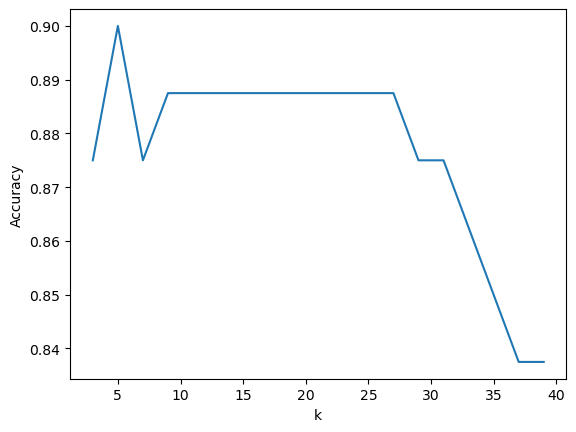

In [77]:
# k의 정확도 시각화
plt.plot(
    k_list, # x축 :3,5,7,9...
    cross_validation_score # y축 : 정확도
)

plt.xlabel('k')
plt.ylabel('Accuracy')

plt.show()

In [78]:
# 가장 예측력이 높은 k를 선정
cvs = cross_validation_score
k = k_list[cvs.index(max(cvs))] # index 함수를 사용하면 예측력이 높은 순서대로 인덱스가 나옴. 예측력이 동점이면 가장 작은 인덱스가 나옴
k

5

---
### 2개의 특징으로 예측하기(3점슛, 블로킹)

In [79]:
knn = KNeighborsClassifier(n_neighbors=k)

# Train의 feature와 target
train_data = train[['3P', 'BLK']]
train_target = train['Pos']

# Test의 feature와 target
test_data = test[['3P', 'BLK']]
test_target = test['Pos']

# 학습시키기
knn.fit(train_data, train_target)

# 검증하기 
print('Train: ', knn.score(train_data, train_target))
print('Test: ', knn.score(test_data, test_target))

Train:  0.9625
Test:  0.95


---
### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [80]:
knn = KNeighborsClassifier(n_neighbors=k)

# Train의 feature와 target
train_data = train[['3P', 'BLK', 'TRB']]
train_target = train['Pos']

# Test의 feature와 target
test_data = test[['3P', 'BLK', 'TRB']]
test_target = test['Pos']

# 학습시키기
knn.fit(train_data, train_target)

# 검증하기 
print('Train: ', knn.score(train_data, train_target))
print('Test: ', knn.score(test_data, test_target))

Train:  0.925
Test:  0.9


---
### 학습한 AI Model 사용해보기

어떤 선수의 점수 : 
- 3P: 3.4
- BLK: 0.5
- TRB: 3.7

In [93]:
# 방법 1
knn.predict([[3.4, 0.5, 3.7]])
    

array(['SG'], dtype=object)

In [92]:
# 방법 2
data = {
    '3P': [3.4],
    'BLK': [0.5],
    'TRB': [3.7]
}

df = pd.DataFrame(data)
df


,3P,BLK,TRB
0,3.4,0.5,3.7


In [95]:
# 예측
pred = knn.predict(df)
print('추천 포지션:', pred[0])


추천 포지션: SG


---
### AI 저장하기

In [96]:
import joblib

In [97]:
fileName = '../Data/knn_basketball.h5'
joblib.dump(knn, fileName)


['../Data/knn_basketball.h5']